# **Lois sécuritaires et criminalité en France**
---

<small>Par Arthur Bidel, William Olivier et Anh Linh Piketty</small>

<br>

## Introduction<a class="anchor" id="partie1"></a>

Le thème de l'insécurité, avec celui de l'ordre, occupent une place importante dans le débat public et l'espace politique de ces dernières décennies. Ancrée à droite, la dénonciation d'une justice laxiste accompagne souvent la mise en exergue d'un "sentiment d'insécurité". Ce type de revendication repose sur plusieurs prémisses. Déjà de l'existence des phénomènes dénoncés mais aussi d'un effet à la baisse d'une législation plus stricte sur les phénomènes délinquants. Dans quelle mesure ces postulats s'appuient sur un ancrage empirique concret ? 

Ce projet de programmation s'inscrit dans la continuité de ce débat et tente (modestement) d'identifier l'effet de la production législative sur la criminalité et la délinquance en France. L'objet initial de notre curiosité était de vérifier si un effet à la baisse de la législation sécuritaire sur les taux de criminalité et de délinquance  était en effet constatable. Additionnellement, nous avons cherché à dresser un portrait plus descriptif de l'évolution de ces phénomènes sur les 20 dernières années ainsi que de la législation associée.

Les chiffres répertoriant les nombres de crimes et délit en France sont aujourd'hui disponible sur d'assez large et période et permettent, bien qu'imparfaitement de documenter les différents aspects et évolutions de la criminalité dans l'hexagone. De même, la production législative est rendue disponible au public permettant de constater son évolution quantitativement et qualitativement. Nous approchons les textes de lois sous un angle plutôt quantitatif ici ce qui ne permet pas de mesurer une augmentation de la sévérité des textes par exemple, des approches NLP pourrait être intéressantes à développer pour approfondir cet angle de recherche. 

*NB1 : Les fonctions de visualisation ont été déplacées dans un script python (***visualisation.py***) pour plus de lisibilité*<br>
*NB2 : Le travail de récupération et de mise en forme des données a été assez long pour les deux bases de données (sur les infractions et la législation) et deux autres notebook leur sont consacrées. Le sommaire cliquable renvoie vers ces notebook pour chacune des parties correspondantes*

## Sommaire

* [Introduction](#partie1)
* [Installation](#partie2)
* [Récuparation et description des données](#partie3)
    * Base délinquance [(voir le notebook *database_délinquance*)](database_délinquance.ipynb)
    * Base légifrance [(voir le notebook *database_légifrance*)](database_légifrance.ipynb)
* [Analyse exploratoire](#partie4)
    * [Portrait de la délinquance en France](#partie41)
        * [Description et visualisation](#partie411)
        * [Cartographie](#partie412)
    * [La législation sécuritaire en France](#partie42)
        * [Statistiques descriptives](#partie421)
        * [Visualisation](#partie422)
* [Modélisation](#partie5)
    * [Fusion des bases de données](#partie51)
    * [Régression de tel indicateur de criminalité sur la production législative](#partie52)
        * [Simple ?????]()
        * [Panel ?????]()
    * [Décalage temporel ?????]()
* [Conclusion et perspectives](#partie6)

## Installation<a class="anchor" id="partie2"></a>

<span style="color:red;">**ici aussi avoir le pip requirement IMPORTANT et faire le pip requirement**</span>

In [ ]:
#Code pour pip requirement faire le pip requirement

<span style="color:red;">**nettoyer dans les truc d'import, laisser que les trucs essentiels et en gros classifier quoi sert à quoi**</span>

In [2]:
#Nettoyer ce truc et laisser les trucs essentiels

# Modules
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import s3fs

from scipy.signal import savgol_filter

import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from IPython.display import Image, display

from shapely import wkt


# Fonctions et dictionnaires
from visualisation import charte_graphique
from visualisation import charte_graphique2
from visualisation import dictionnaire_geo
from visualisation import custom_greys_cmap
from visualisation import tracer_evolution_taux
from visualisation import tracer_evolution_taux_relatif_lisse
from visualisation import boxplot_indicateur_par_saison
from visualisation import évolution_indicateur
from visualisation import evolution_indicateur_animation
from visualisation import animer_evolution_densite
from visualisation import evolution_idf_animation
from visualisation import get_increase
from visualisation import get_mean

## Récuparation et description des données<a class="anchor" id="partie3"></a>

Les tableaux de données conçus au début de notre travail, dans les deux notebooks consacrés, ont tous les deux été stockés sur S3 et on les récupère prêts à l'usage dans cette partie. Les parties de récupération et nettoyage des données sont donc optionnelles à la lecture mais offrent néanmoins des éclairages méthodologiques quant à la construction des indicateurs et des variables utilisées dans ce travail (lisez les svp...).

<span style="color:red;">**régler le problème de ce code marche pas**</span>

In [3]:
import s3fs

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

['anhlinh/diffusion']

* #### Tableaux de données concernant la criminalité : 

In [4]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_dep = pd.read_csv(file_in)

# Vérification
df_indicateurs_dep.head()

Unnamed: 0        Date Département Indicateur  Nombre  Population  \
0           0  1996-01-01          01  Homicides     0.0      499310   
1           1  1996-01-01          02  Homicides     1.0      538017   
2           2  1996-01-01          03  Homicides     0.0      349376   
3           3  1996-01-01          04  Homicides     0.0      137453   
4           4  1996-01-01          05  Homicides     0.0      118526   

   Taux (/10 000)  Année  Mois          Nom Département  Superficie (km2)  \
0        0.000000   1996     1                      Ain              5762   
1        0.018587   1996     1                    Aisne              7362   
2        0.000000   1996     1                   Allier              7340   
3        0.000000   1996     1  Alpes-de-Haute-Provence              6925   
4        0.000000   1996     1             Hautes-Alpes              5549   

     Densité  
0  86.655675  
1  73.080277  
2  47.598910  
3  19.848809  
4  21.359885

In [5]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_nat = pd.read_csv(file_in)

# Vérification
df_indicateurs_nat.head()

Unnamed: 0        Date          Zone                      Indicateur  \
0           0  1996-01-01  France_Métro  Coups et blessures volontaires   
1           1  1996-02-01  France_Métro  Coups et blessures volontaires   
2           2  1996-03-01  France_Métro  Coups et blessures volontaires   
3           3  1996-04-01  France_Métro  Coups et blessures volontaires   
4           4  1996-05-01  France_Métro  Coups et blessures volontaires   

   Nombre  Population  Taux (/10 000)  Année  Mois     Saison  Taux relatif  \
0  5616.0       57936        0.969345   1996     1      Hiver      1.000000   
1  6115.0       57943        1.055347   1996     2      Hiver      1.088722   
2  6668.0       57951        1.150627   1996     3  Printemps      1.187015   
3  6800.0       57963        1.173162   1996     4  Printemps      1.210262   
4  7415.0       57976        1.278978   1996     5  Printemps      1.319424   

   Taux de pauvreté (%)  
0                  19.3  
1                  19.3  
2                  19.3  
3                  19.3  
4                  19.3

Pour ce qui est de la délinquance, nous disposons de deux tableaux de données, un à l'échelle départementale et un à l'échelle nationale. On trouve dans chacun d'entre eux huit indicateurs de criminalité et de délinquance construit selon la méthodologie actuelle du ministère de l'intérieur. Les huits indicateurs sont les : *homicides*, *tentatives d'homicides*, *coups et blessures volontaires*, *vols avec violence*, *vols sans violence*, *escroqueries*, *violences sexuelles* et *infractions liées à la consommation ou la vente de stupéfiants*.

Nous avons utilisé les nombres brut d'infractions recensées par les forces de l'ordre, par types (107 différents), entre 1996 et 2022, mis à disposition en open data par le ministère de l'intérieur ainsi que les estimations de population de l'INSEE pour obtenir les taux de délinquance (définit comme le rapport du nombre de délit/crime sur la population) associés à chacun des indicateurs.

Nous avons également déjà ajouté à ces bases les variables qui nous serviront de contrôle dans la partie modélisation de ce travail. A savoir la densité pour la base départementale et le taux de pauvreté pour la base nationale. La densité sert ici de proxy à la densité urbaine qui pourrait à la fois être un facteur criminogène et un handicap pour le maintien de l'ordre. Elle a été déterminée grâce aux estimations de population déjà mentionnée et à les superficie des départements scrapées de Wikipédia. Le taux de pauvreté a été obtenue via l'INSEE mais malheureusement nous n'avons pas trouvé de données à l'échelle départementale pour toutes les années couvertes par nos bases.

La plupart de nos sources comportaient des données manquantes pour les territoires d'Outre-Mer et nous avons donc décidé de centrer notre travail sur la France métropolitaine. De même il n'était pas possible d'obtenir des données à granularité mensuelle pour les données départementales et on s'est donc satisfait d'une granularité annuelle. 

Vous pouvez trouvez plus de précision sur la construction de ces tables dans le notebook consacré ([juste là !](database_délinquance.ipynb)).

* #### Tableaux de données concernant la production législative : 

<span style="color:red;">**nettoyer le truc légifrance et tranferer visu dans script et sauvegarder df et faire code ici pour récup df, saccorder sur dernière version du df dont besoin svp est ce que je peux ne pas le faire j'ai pas trop bossé dessus**</span>

In [ ]:
#Code pour récup ça quand ce sera enregistré sur S3 obviously

Pour ce qui est de la production législative, notre DataFrame principal recense le nombre de textes publié par mois selon le type de textes (Lois, Arrêtés, Ordonnances, Décrets, etc). L'analyse reste donc quantitative et des approches en NLP pourrait enrichir la démarche en permettant d'évaluer la sévérité d'un texte par exemple. 


<span style="color:red;">**BESOIN DE PLUS DE D2TAILS SUR CA MAIS JSP QUOI DIRE JE MEN SUIS PAS OCCUP2E C4EST LA MISSION DE QUELQUUN DAUTRE**</span>

De même vous pouvez, pour plus de détails, consulter le notebook consacré ([ici](database_légifrance.ipynb)).

## Analyse exploratoire<a class="anchor" id="partie4"></a>

### Portrait de la délinquance en France<a class="anchor" id="partie41"></a>

#### Description et visualisation<a class="anchor" id="partie411"></a>

Etudions d'abord l'évolution de chacun de nos indicateurs sur la période de données disponible (1996 à 2022).

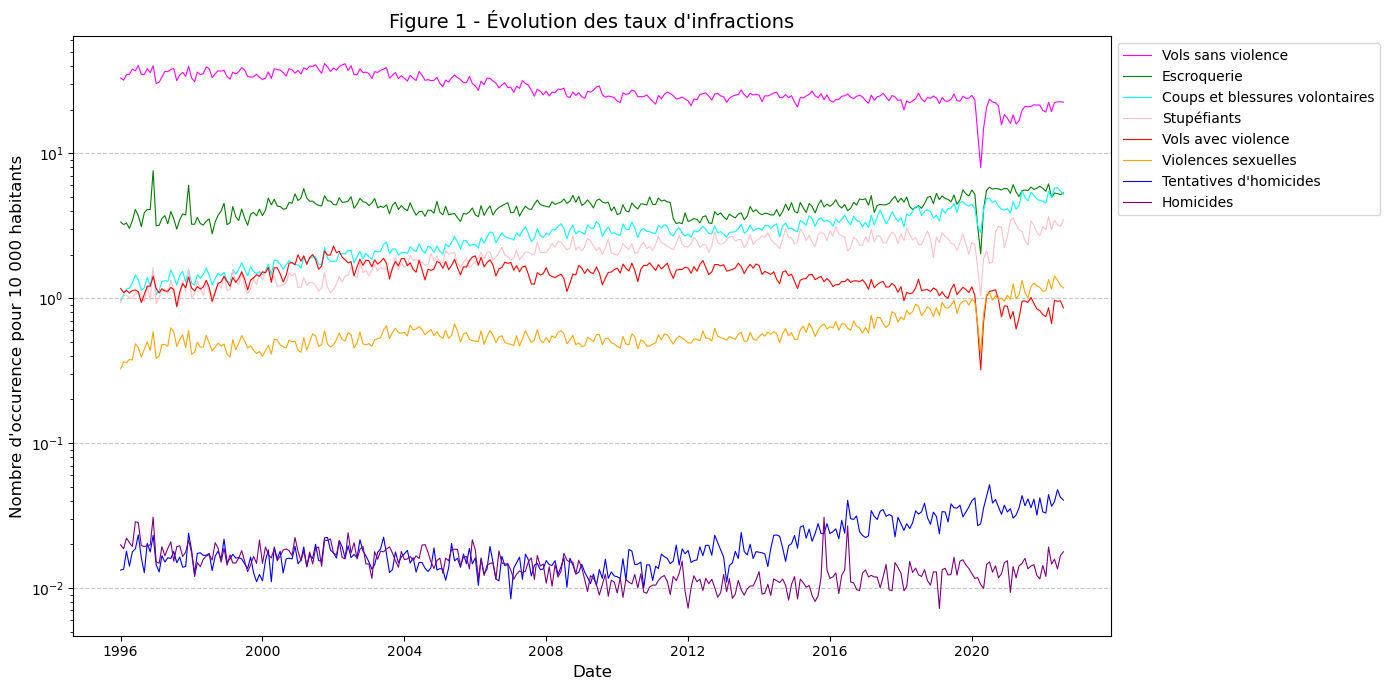

In [5]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True, title="Figure 1 - Évolution des taux d'infractions")

Même si l'échelle logarithmique écrase un peu les évolutions de long terme, la Figure 1 permet d'illustrer les évolutions des nombres d'infractions pour 10 000 habitants pour chacun de nos indicateurs. On remarque d'ores et déjà des évolutions contrastées. Certains types d'infractions sont plutôt à la baisse (homicides, vols de tout types) quand d'autres augmentent (tentatives d'homicides, coups et blessures volontaires, escroqueries).

De manière générale, les taux d’infraction ne présentent pas de variations brutales au fil du temps : ils suivent une tendance relativement stable à part les homicides et les tentatives d'homicides qui repartent à la hausse depuis la dernières décennies (même si les homicides sont toujours moins fréquents en 2022 qu'en 1996).

En normalisant tous les taux à leur valeur en 1996, les Figures 2 et 3 permettent de visualiser l’évolution relative de chaque type d’infraction par rapport à cette année de référence. En particulier, la Figure 3 présente les courbes lissée des tendances grâce à l’application d’un filtre de Savitzky-Golay. Ce filtre est conçu pour lisser les séries temporelles en ajustant des polynômes locaux à travers une fenêtre glissante, ce qui permet d'éliminer le "bruit" statistique.

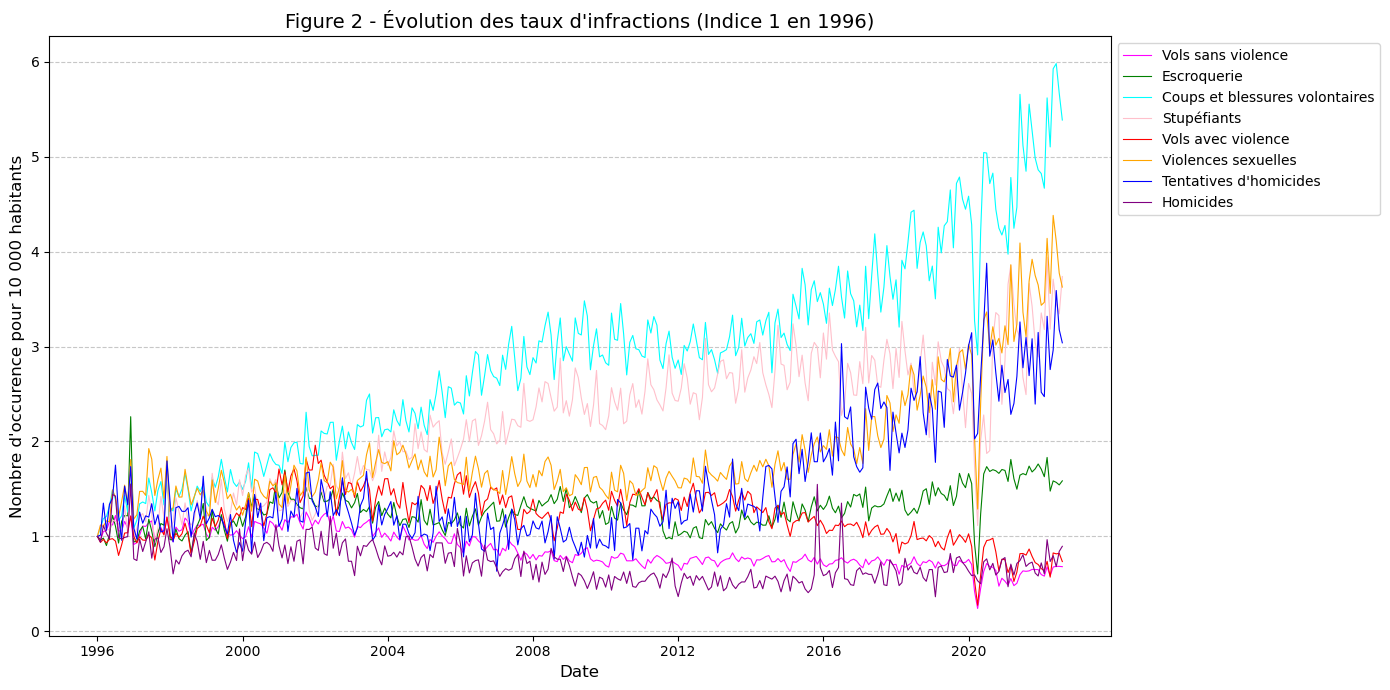

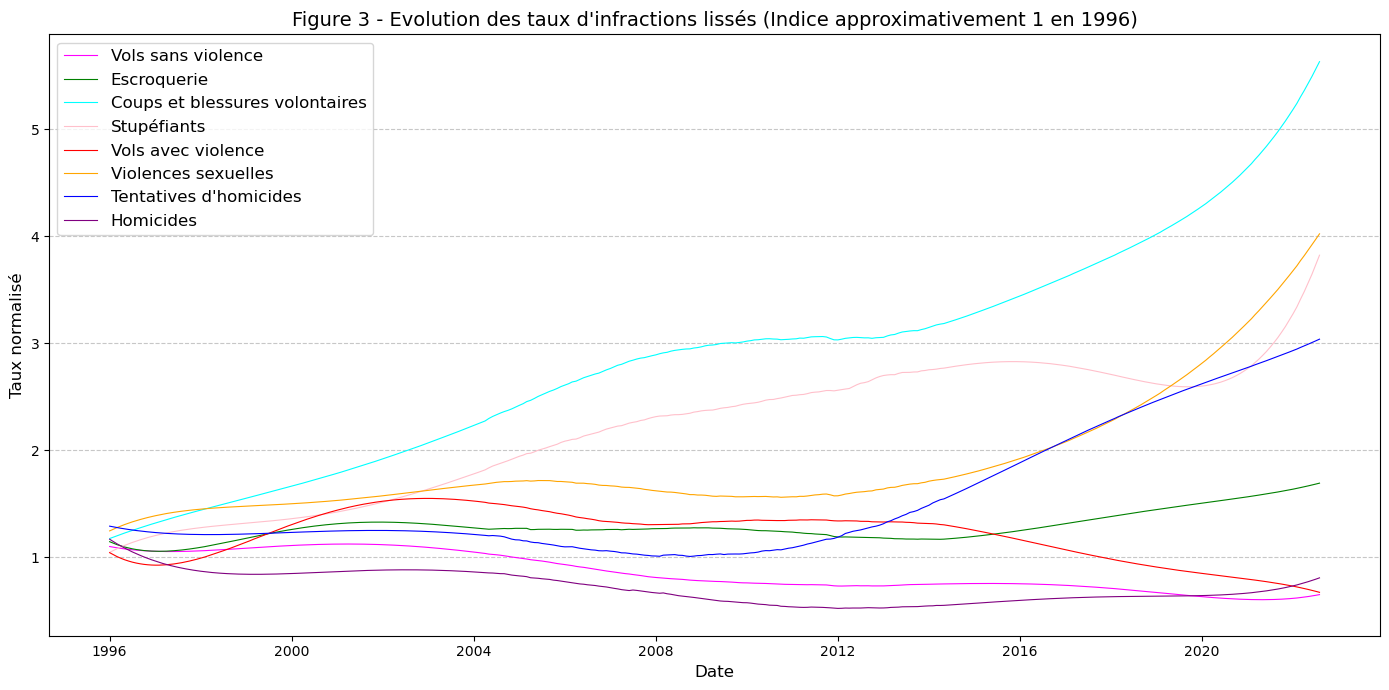

 Homicides entre 1996-01-01 et 2022-08-01: -10.47858905472778 %
 Tentatives d'homicides entre 1996-01-01 et 2022-08-01: 203.96935961992378 %
 Vols avec violence entre 1996-01-01 et 2022-08-01: -26.53294218387946 %
 Vols sans violence entre 1996-01-01 et 2022-08-01: -31.904976615785706 %
 Escroquerie entre 1996-01-01 et 2022-08-01: 58.49635036177963 %
 Coups et blessures volontaires entre 1996-01-01 et 2022-08-01: 438.69498681855345 %
 Violences sexuelles entre 1996-01-01 et 2022-08-01: 262.6825902105622 %
 Stupéfiants entre 1996-01-01 et 2022-08-01: 273.78697439863026 %


In [6]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 2 - Évolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique, title="Figure 3 - Evolution des taux d'infractions lissés (Indice approximativement 1 en 1996)")

liste = ['Homicides', "Tentatives d'homicides", 'Vols avec violence', 'Vols sans violence', 'Escroquerie', 'Coups et blessures volontaires', 'Violences sexuelles', 'Stupéfiants']
for indicateur in liste : 
    get_increase(df_indicateurs_nat, indicateur=indicateur, date1='1996-01-01', date2='2022-08-01')

In [7]:
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='1996-01-01', date2='2007-01-01')
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='2007-01-01', date2='2022-08-01')

 Violences sexuelles entre 1996-01-01 et 2007-01-01: 48.36255085018586 %
 Violences sexuelles entre 2007-01-01 et 2022-08-01: 144.45696581261487 %


A nouveau, on constate des tendances contrastées ce qui traduit une transformation des phénomènes délinquances. Les menages seraient moins souvent confrontés à des vols de tout types mais plus souvent à des escroqueries ce qui coincide avec les enquêtes de victimation. Plus généralement, les homicides et vols sont à la baisse alors que le reste des indicateurs augmentent (plus ou moins). On constate par exemple que les coups et blessures volontaires ont plus que quadruplées (augmentation de 438%). Les violences sexuelles augmentent elles-aussi significativement sur la période puisqu'elles font plus que doubler. Dans un contexte de libération de la parole et d’incitation à déposer plainte, notamment à travers l’amélioration (toute relative) des conditions d’accueil des victimes, les personnes déclarent plus fréquemment avoir subi des violences sexuelles et déposent plus souvent plainte. Cette augmentation ne concorde en revanche pas avec les résultats des enquêtes de victimation qui restent plutôt stable. Il est par ailleurs intéressant de constater que l'augmentation des violences sexuelles déclarées est beaucoup plus accrue dans la deuxième moitié de la période (qui correspond à la période d'existence du mouvement Me Too).

Enfin, la Figure 4, quant à elle, zoome sur une période spécifique : celle de la pandémie de COVID-19.

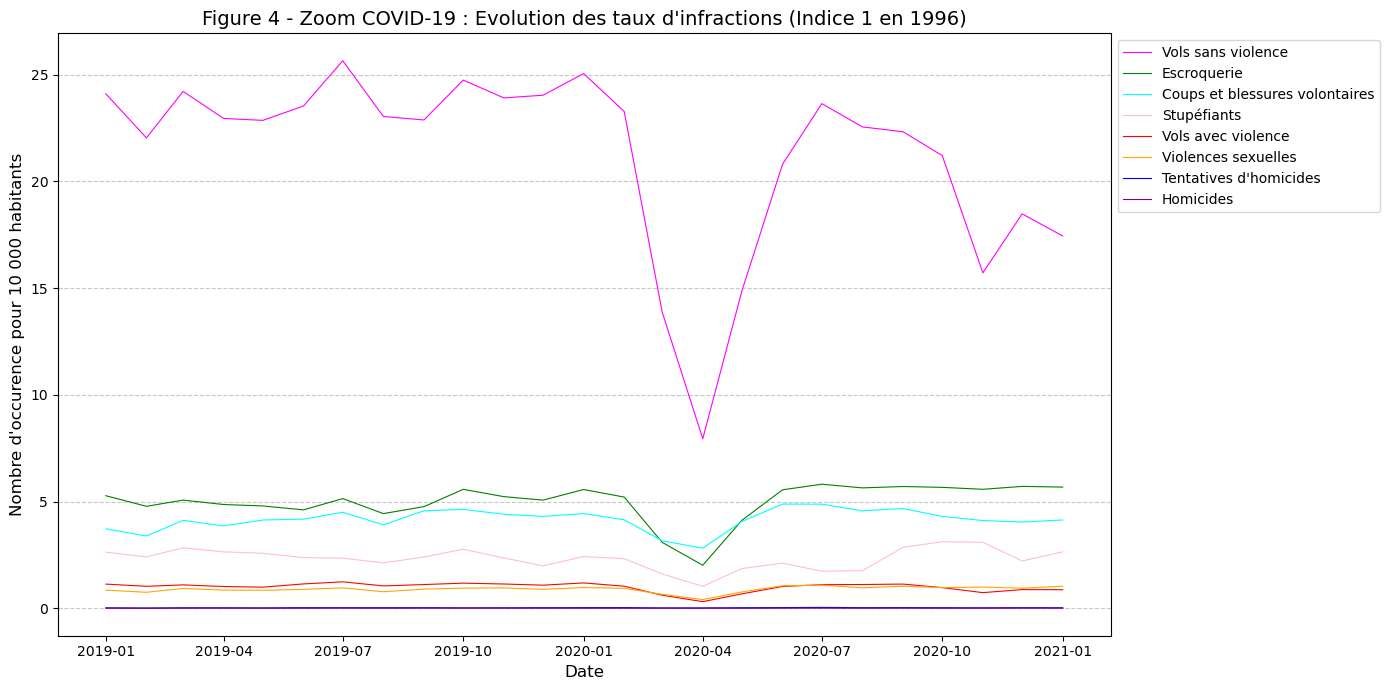

In [8]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, title="Figure 4 - Zoom COVID-19 : Evolution des taux d'infractions (Indice 1 en 1996)", use_log_scale=False, time_period=["2019-01-01", "2021-01-01"])

Cette période est marquée par une chute significative de presque tous les indicateurs, avec un creux particulièrement notable en avril 2020, correspondant aux mesures de confinement les plus strictes. Seuls les homicides semblent relativement épargnées par cette baisse, ce qui pourrait s'expliquer par la nature moins opportuniste de ce type de crime (donc moins influencé par les restrictions de mobilité). L'activité criminelle a ainsi été largement perturbée par les restrictions de déplacement, la fermeture des commerces, l'augmentation de la surveillance, etc.

D'autres tendance globale de l'activité criminelle se remarques dans nos données, notamment une certaine saisonnalité.

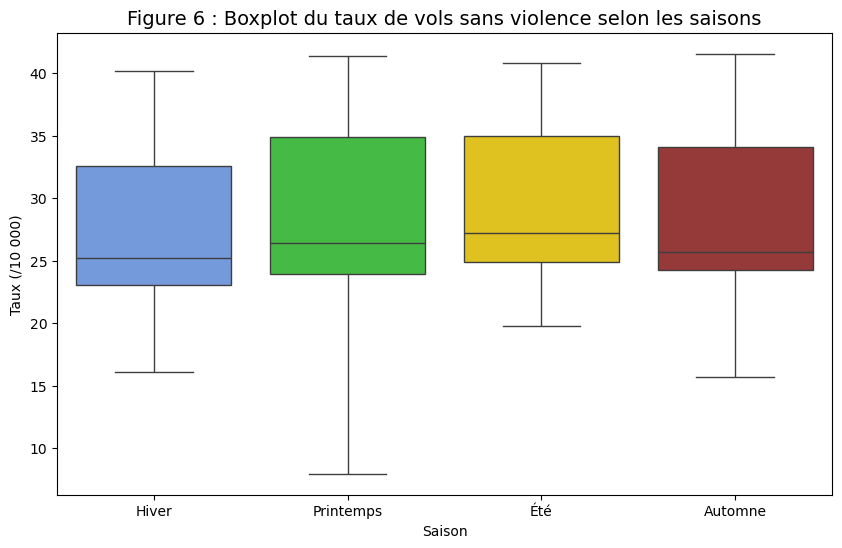

In [12]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence", title="Figure 6 : Boxplot du taux de vols sans violence selon les saisons")

La Figure 6 n'illustre que le cas des vols sans violences, mais en affichant les autres boxplot, une tendance générale à un taux d'infractions plus élevé en été apparaît pour tous les indicateurs.

#### Cartographie<a class="anchor" id="partie412"></a>

<span style="color:red;">**imo supprimer de la fonction ci dessous le truc qui print "anim sauvegardée machin" parce que ça fait pas très joli dans le main**</span>

Pour finir, nous une représentation plus visuelle de ces évolutions avec des cartes animées. Il est intéressant de constater que si, pour certains indicateurs certaines concentrations géographiques restent constantes autour du temps (autour de l'Ile de France et de la côté d'Azur souvent), ces phénomène de concentratons n'existent pas pour les homicides ou les violences sexuelles qui semblent beaucoup plus uniformément répartis sur le territoire.

In [ ]:
for indicateur in liste :
    evolution_indicateur_animation(df_indicateurs_dep, indicateur, dictionnaire_geo)

En parallèle de ces évolutions assez substantielles de nos indicateurs de criminalité, on a cherché à observer si la densité évoluait particulièrement sur la période. En pratique l'échelle du département est probablement trop large pour rendre compte de ces évolutions (les campagnes "noient" les évolutions qui sont surtout urbaines). Plus généralement, en consultant la littérature associée, il semble que l'inclusion de critère géographique dans l'étude de la criminalité pose souvent ce type de problème puisque l'échelle départementale est souvent inadaptée à l'échelle à laquelle ont étudie souvent les organisations spatiales.

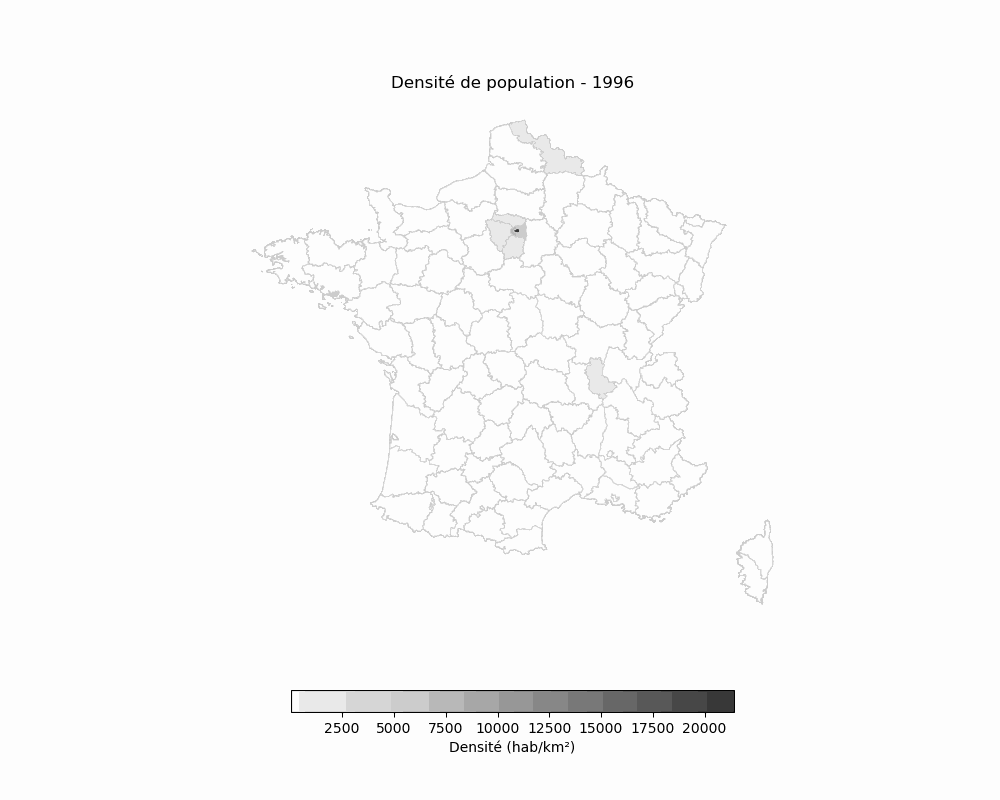

Animation sauvegardée dans animations/evolution_densite.gif


In [7]:
animer_evolution_densite(df=df_indicateurs_dep, colonne_densite='Densité', dictionnaire_geometrie=dictionnaire_geo)

Si on est très attentif, on voit que l'essentiel des variations se fait au niveau de l'Ile de France, on a donc proposé un zoom au niveau de cette zone géographique, qui résume en pratique quasi la totalité des variations de densité visible à cette échelle.

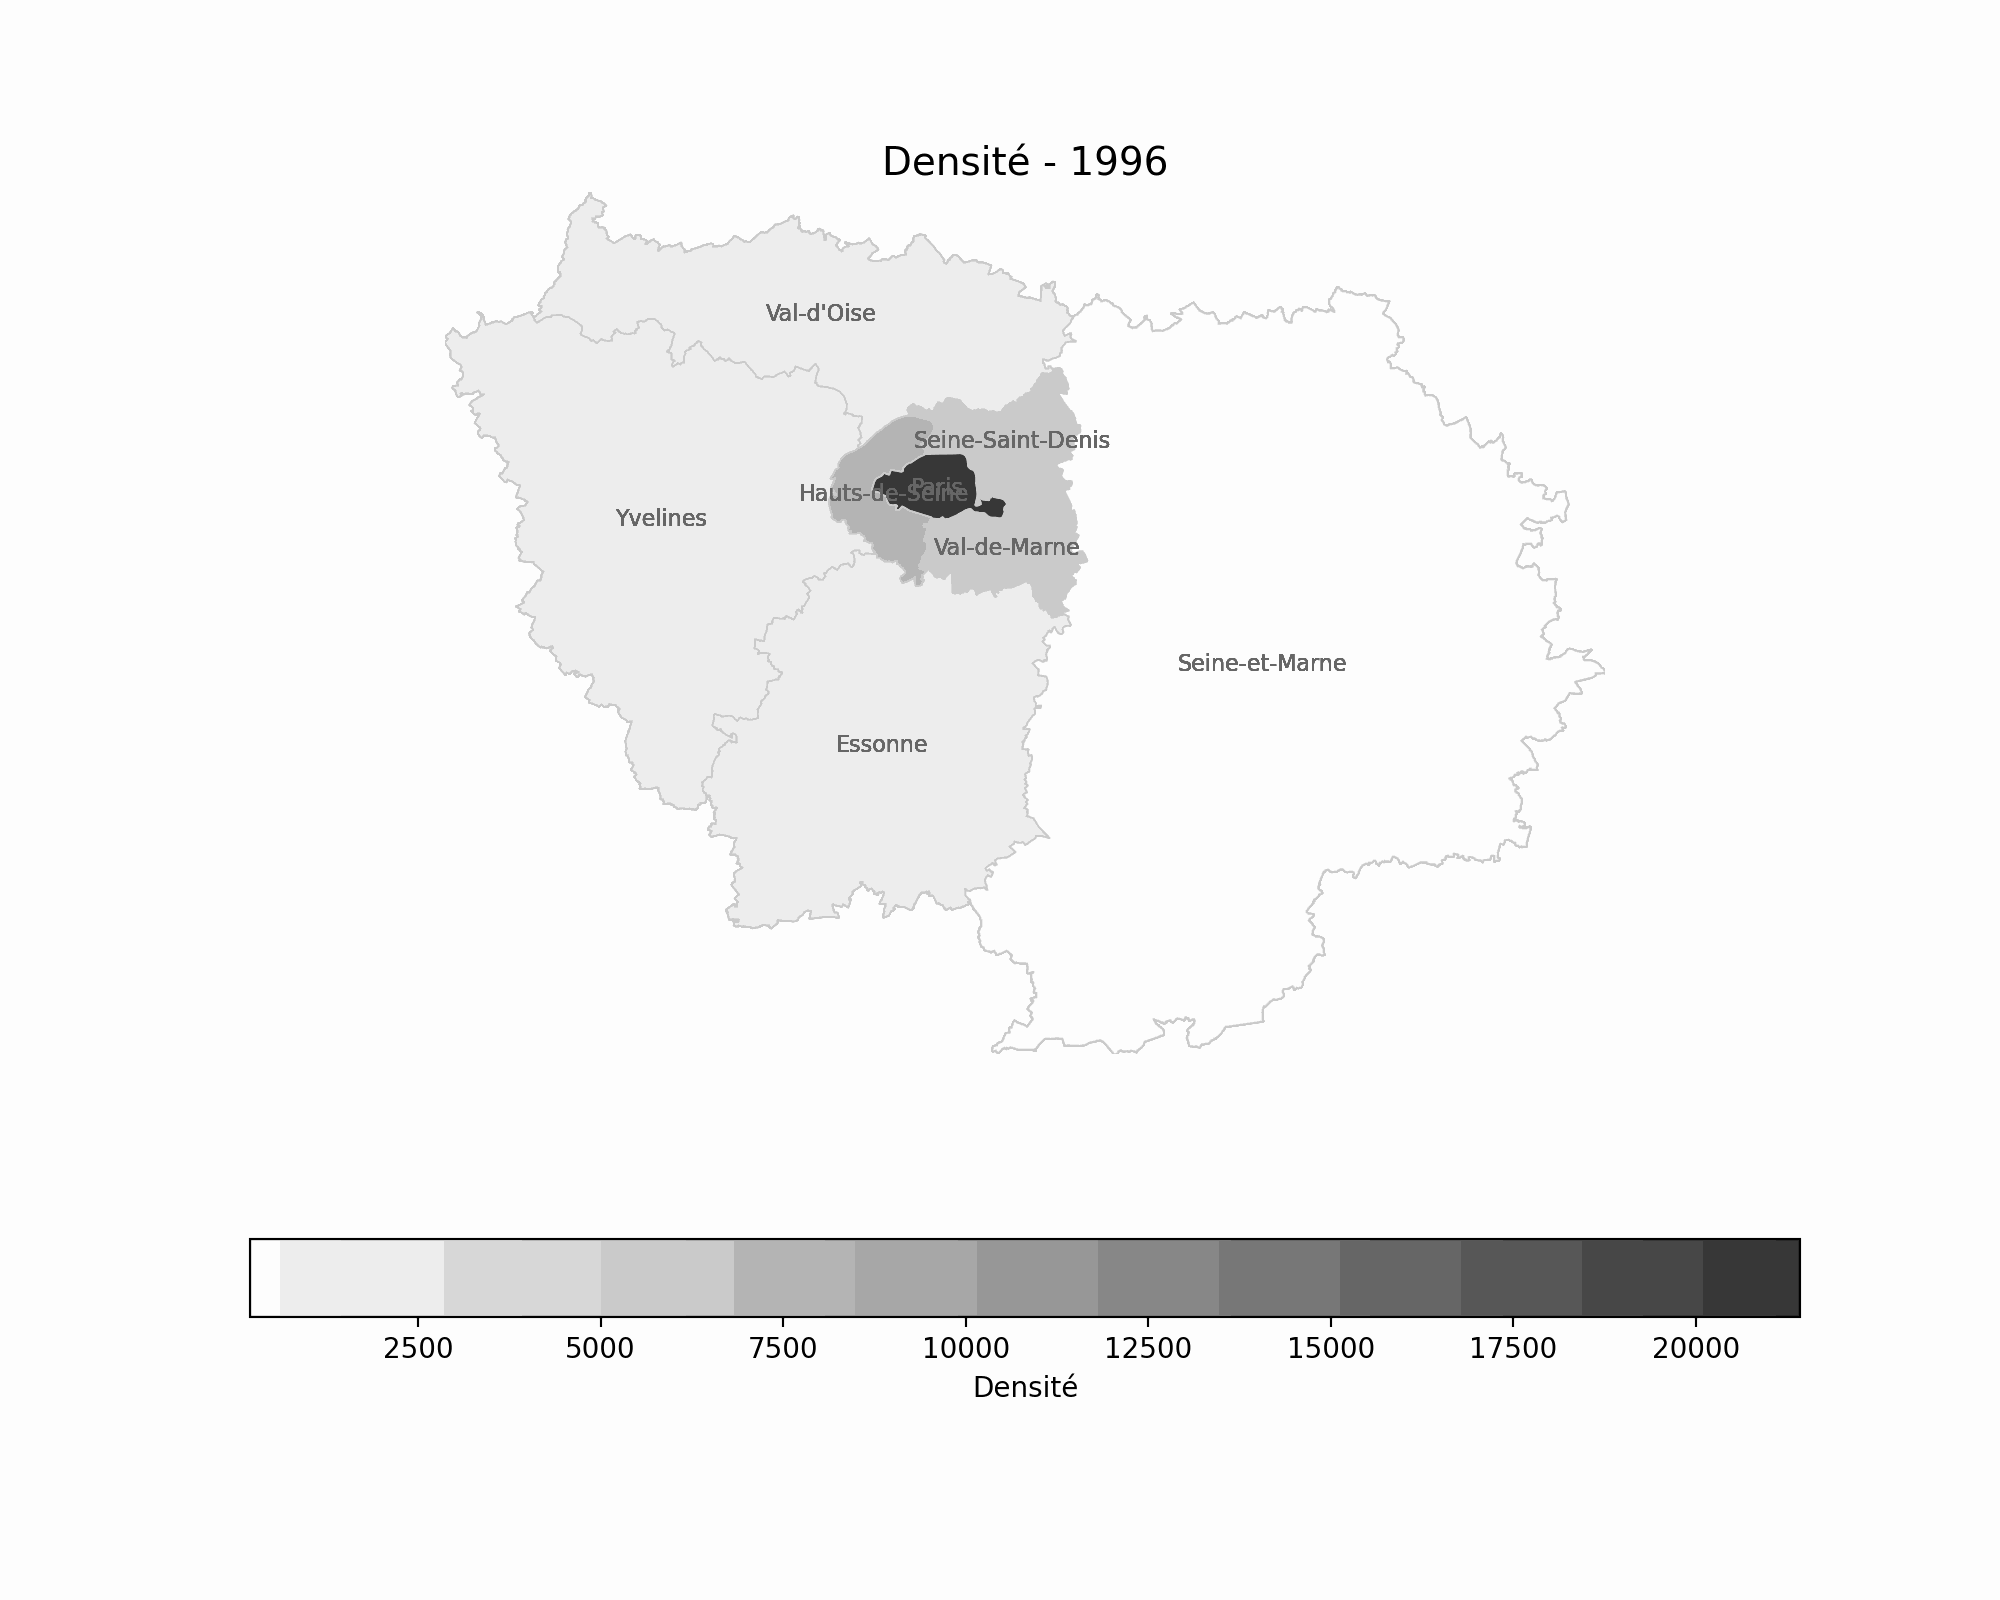

Animation sauvegardée dans animations/evolution_idf_densite.gif


In [7]:
evolution_idf_animation(df_indicateurs_dep, 'Densité')

### La législation sécuritaire en France<a class="anchor" id="partie42"></a>

<span style="color:red;">**ECRIRE CETTE PARTIE**</span>

#### Statistiques descriptives<a class="anchor" id="partie421"></a>

#### Visualisation<a class="anchor" id="partie422"></a>

<span style="color:red;">**déplacer les fonctions de database_légifrance dans le script et les importer ici pour la partie de stat desc**</span>

## Modélisation<a class="anchor" id="partie5"></a>

### Fusion des bases de données<a class="anchor" id="partie51"></a>

### Régression(s ?)<a class="anchor" id="partie51"></a>

<span style="color:red;">**la faire, here des indicatiosn tirées de chat et de vergara-merino**</span>


Explication de en gros ce que j'ai compris de chatgpt et vergara-merino

On peut faire une regréssion de panel de la forme : <br>
$$
Y_it = \alpha + \beta \cdot L_t + \gamma \cdot G_it + \mu _i + \epsilon _it
$$

où : <br>
$Y_it$ : Taux de criminalité (pour notre indicateur préféré qu'on choisirat j'imagine) di département i à l'année t<br>
$L_t$ : Mesure de l'intensité législative, comme on a pas les arrêtés préfectoraux sur légifrance on est obligé d'en faire une variable constante pour tous les départements i, elle est donc seulement indicée par t (les différences entre departement viennent donc des variables de contrôles à priori)<br>
$G_it$ : Variable de contrôle : pour la table départementale c'est la densité (en vrai l'échelle départementale est pas hyper appropriée pour l'utiliser comme contrôlé mais bon)<br>
$\mu _i$ : effet fixe aux départements (pour différences structurelles non observées)<br>
$\epsilon _it$ : error term<br>


Regression simple aussi : <br>
$$
Y_t = \alpha + \beta \cdot L_t + \gamma \cdot G_t + \epsilon _t
$$

où : <br>
$Y_t$ : Taux de criminalité (pour notre indicateur préféré qu'on choisirat j'imagine)  à l'année t<br>
$L_t$ : Mesure de l'intensité législative<br>
$G_t$ : Variable de contrôle : pour la table nationale, le taux de pauvreté<br>
$\epsilon _t$ : error term<br>


Complément chatgpt sur les deux trucs, pas exécuter ces lignes de code, lui demander pour further details

In [ ]:
 Mise en Place du Code pour regression de panel:
Bibliothèque Python : Utilise statsmodels ou linearmodels pour estimer les régressions de panel.
Exemple de Code :

from linearmodels.panel import PanelOLS
import pandas as pd

# Chargement des données en format panel
data = pd.read_csv("data_panel.csv")  # Assure-toi que le dataset est au format long
data = data.set_index(['department', 'year'])

# Modèle à Effets Fixes
model = PanelOLS.from_formula('Y ~ L + G + EntityEffects', data=data)
results = model.fit()
print(results.summary)


In [ ]:
Suggestions :
Inclure des retards législatifs : Les lois peuvent ne pas avoir d'effet immédiat. Tu pourrais tester des versions retardées de 
𝐿𝑡 (par exemple, 𝐿𝑡−1,𝐿𝑡−2)

Validation des hypothèses : Vérifie que les résidus ne sont pas autocorrélés (test de Durbin-Watson, etc.).

3. Mise en Place du Code :
Bibliothèque Python : statsmodels pour les régressions simples.
Exemple de Code :
python
Copier le code
import statsmodels.api as sm

# Préparer les variables
X = df[['L', 'G']]  # Variables explicatives
X = sm.add_constant(X)  # Ajoute une constante pour l'intercept
Y = df['Y']  # Variable dépendante

# Régression simple
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

## Conclusion et perspectives<a class="anchor" id="partie6"></a>

<br>
<br>

<span style="color:red;">**!!!**</span>

<br>

<span style="color:red;">**NORMALEMENT EN DESSOUS CEST DE LA REDITE ET CEST SUPPRIMABLE MAIS VERIFIER AVEC LES AUTRES**</span>


<span style="color:red;">**IL FAUT NETTOYER LE SCRIPT PYTHON DE VISUALISATION CAR IL EST IGNOBLE**</span>

<br>

<span style="color:red;">**!!!**</span>

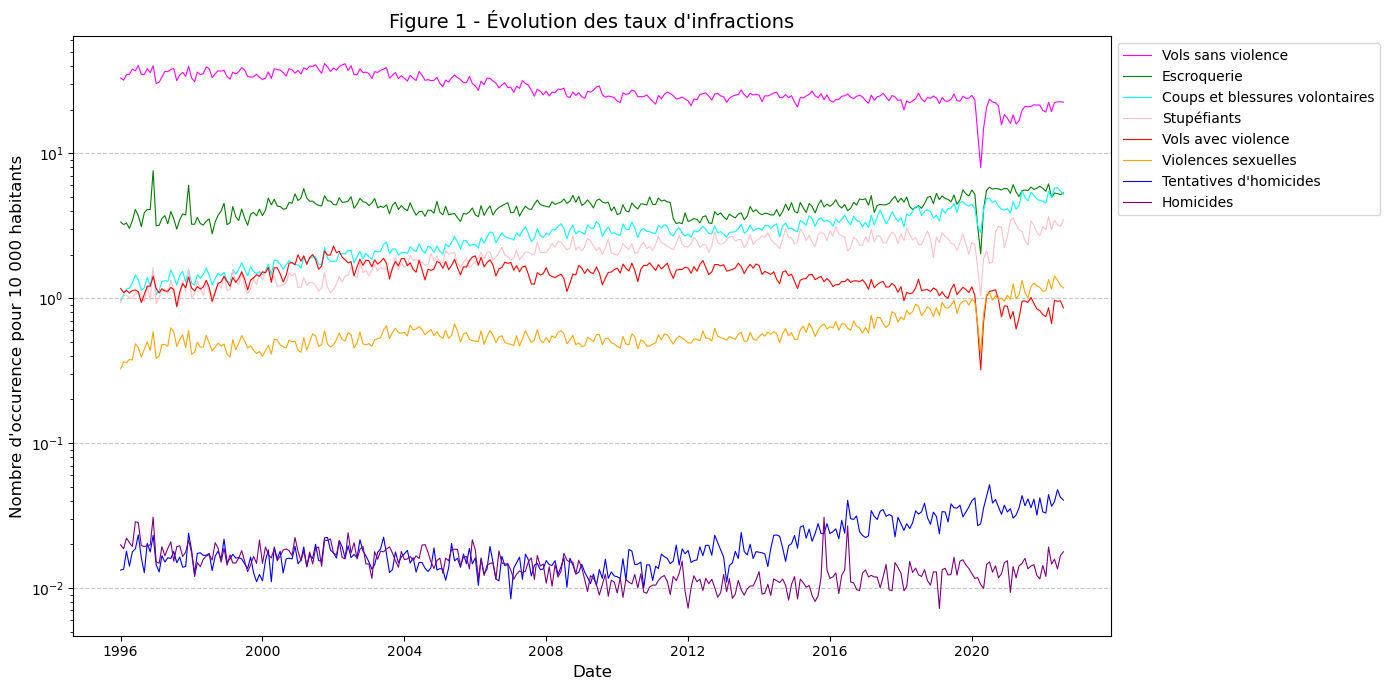

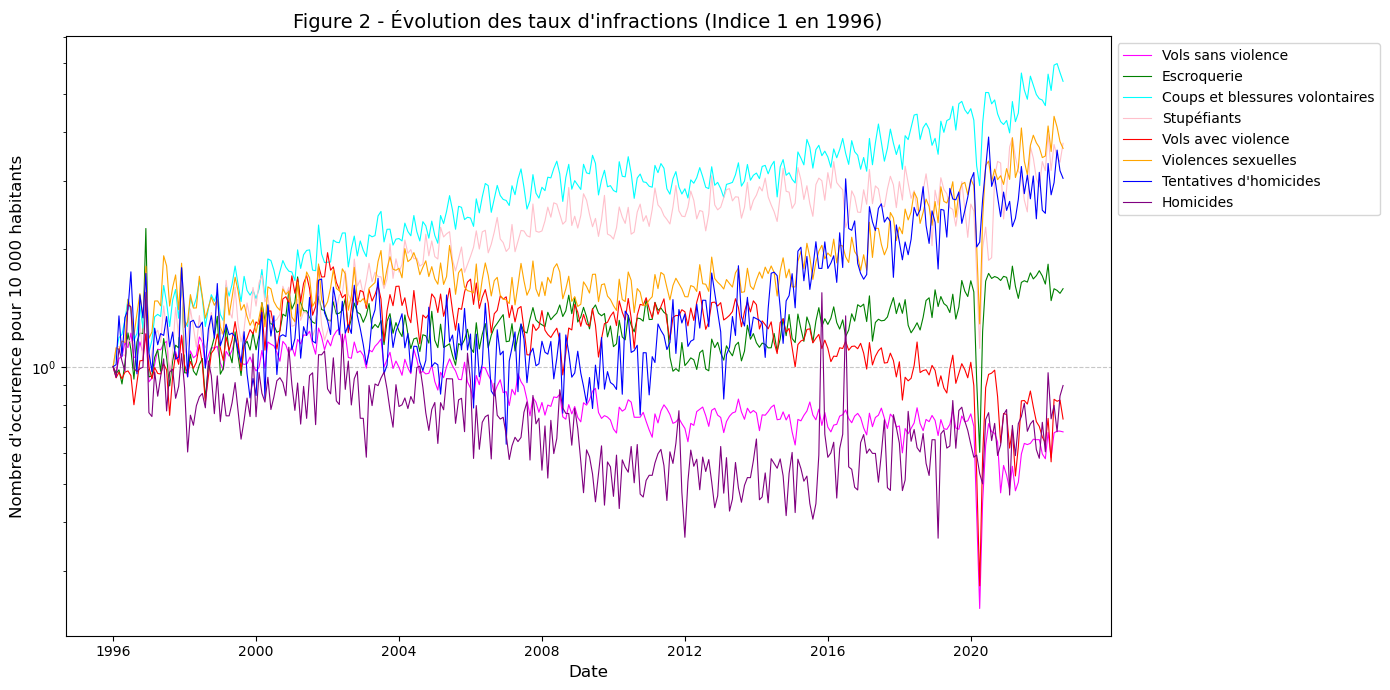

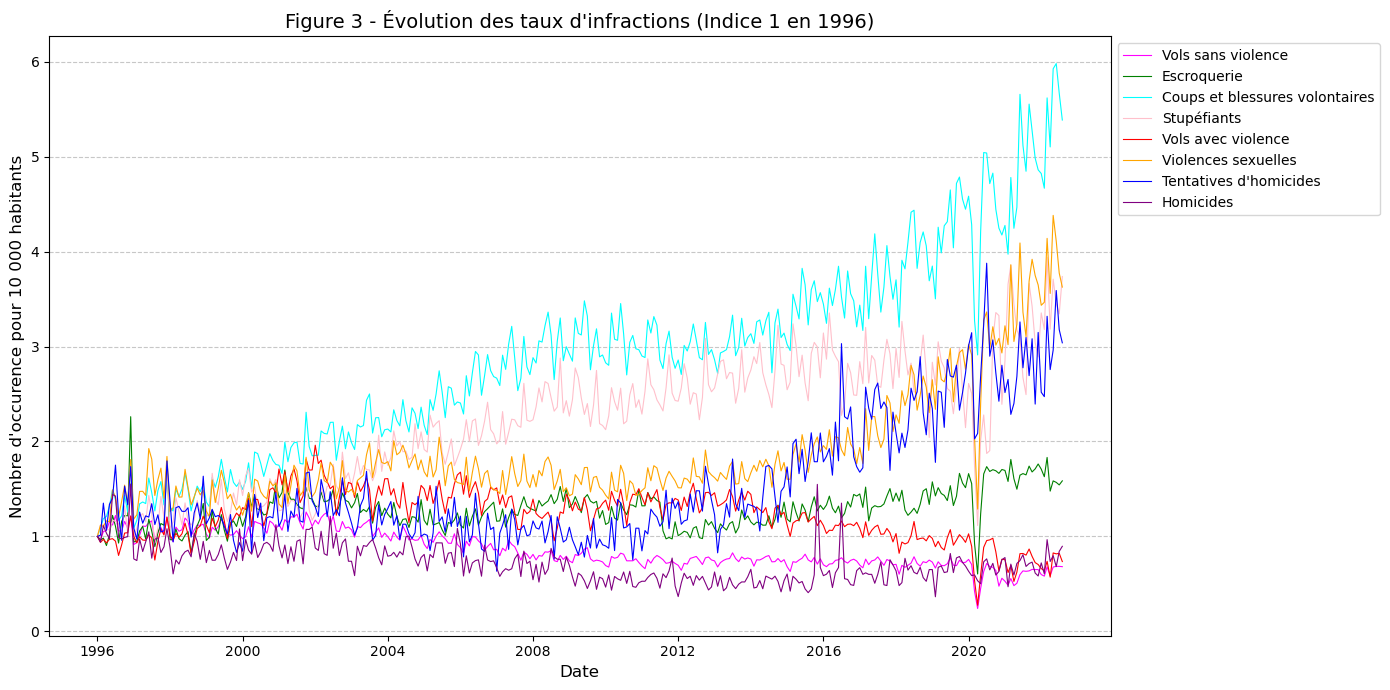

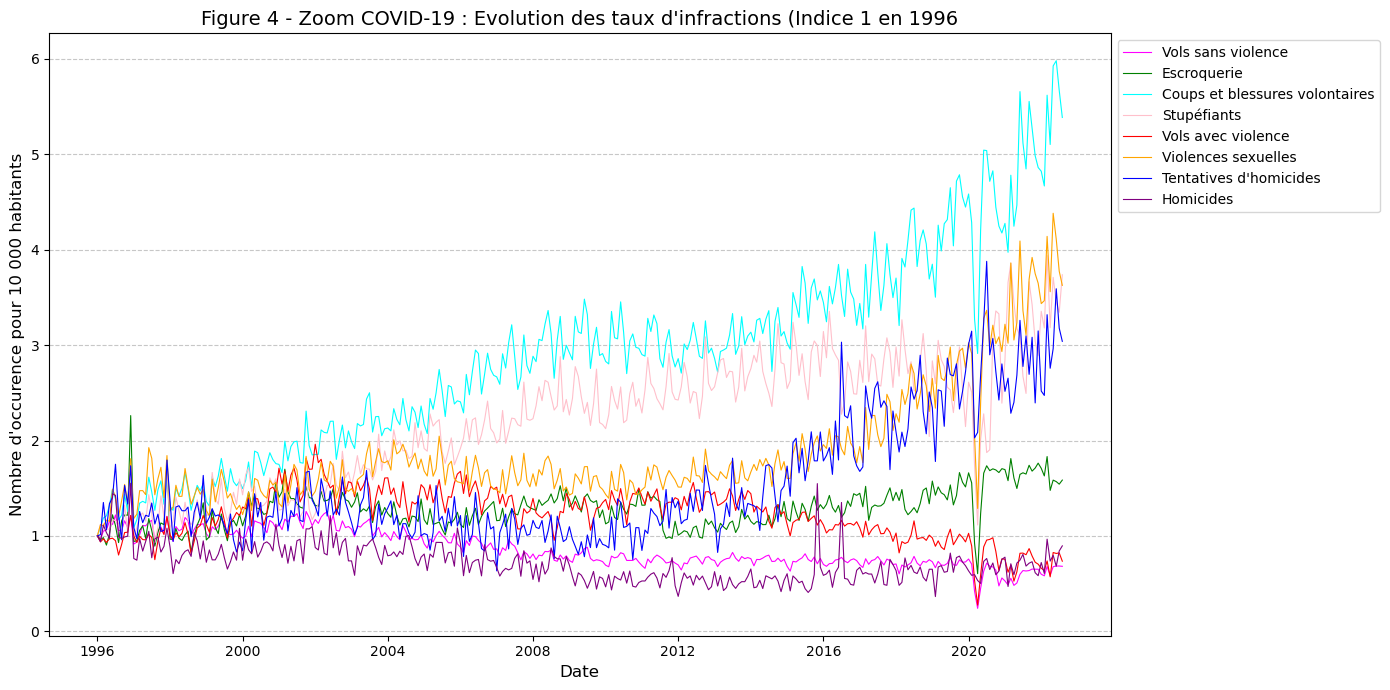

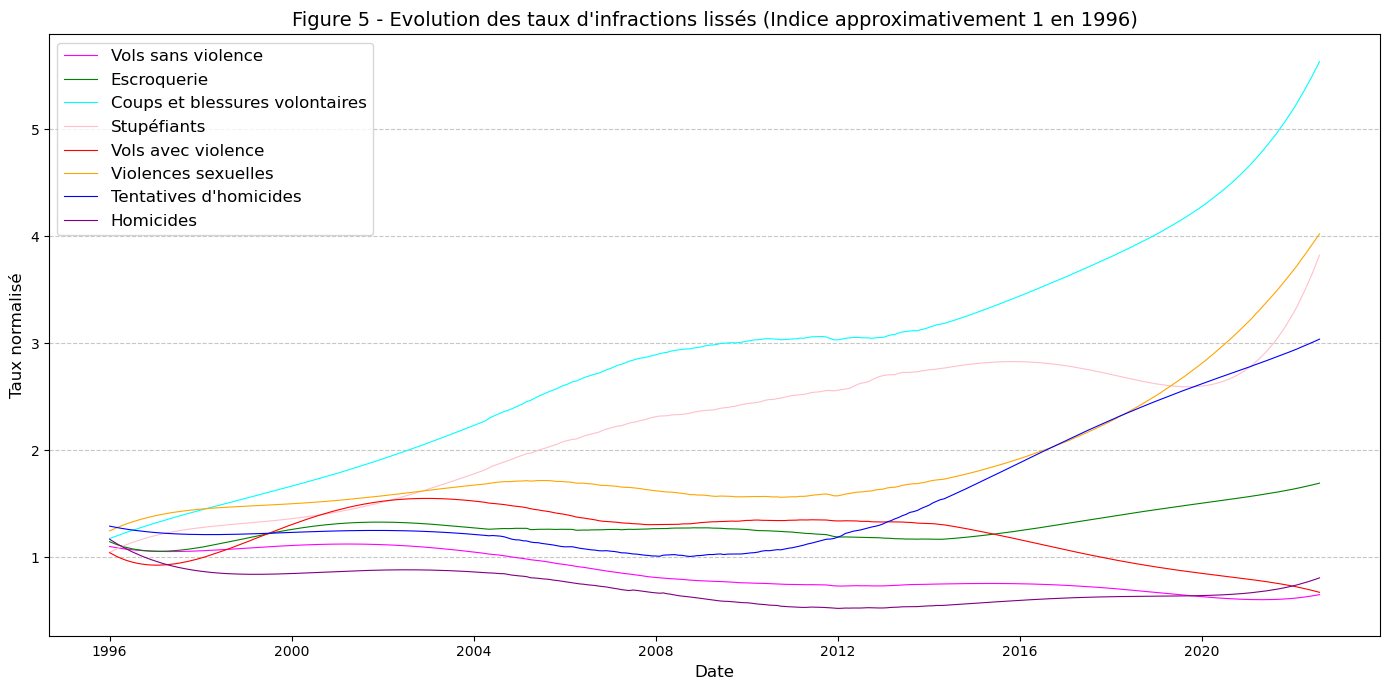

In [31]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True, title="Figure 1 - Évolution des taux d'infractions")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 2 - Évolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = True, time_period=[])
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 3 - Évolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 4 - Zoom COVID-19 : Evolution des taux d'infractions (Indice 1 en 1996")
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique, title="Figure 5 - Evolution des taux d'infractions lissés (Indice approximativement 1 en 1996)")

La Figure 1 met en évidence que certaines infractions sont nettement moins fréquentes (comme les homicides et les tentatives d’homicide) par rapport à d'autres, bien plus répandues (vols et escroqueries). De manière générale, les taux d’infraction ne présentent pas de variations brutales au fil du temps : ils suivent une tendance relativement stable. Toutefois, on perçoit une légère hausse au cours de la dernière décennie, notamment pour certaines catégories comme les homicides, les tentatives d’homicide, les coups et blessures volontaires ainsi que les escroqueries.

En normalisant tous les taux à leur valeur en 1996, les Figures 2 et 3 permettent de visualiser l’évolution relative de chaque type d’infraction par rapport à cette année de référence. Aujourd'hui, on constate clairement que les coups et blessures volontaires recensés ont quintuplé. Viennent ensuite les violences sexuelles, les infractions liées aux stupéfiants et les tentatives d’homicide, qui ont tous plus que triplé.

La Figure 4, quant à elle, zoome sur une période spécifique : celle de la pandémie de COVID-19. Cette période est marquée par une chute significative de presque tous les indicateurs, avec un creux particulièrement notable en avril 2020, correspondant aux mesures de confinement les plus strictes. Seuls les homicides semblent relativement épargnées par cette baisse, ce qui pourrait s'expliquer par la nature moins opportuniste de ce type de crime (donc moins influencé par les restrictions de mobilité). L'activité criminelle a ainsi été largement perturbée par les restrictions de déplacement, la fermeture des commerces, l'augmentation de la surveillance, etc.

Enfin, la Figure 5 présente les courbes lissée des tendances grâce à l’application d’un filtre de Savitzky-Golay. Ce filtre est conçu pour lisser les séries temporelles en ajustant des polynômes locaux à travers une fenêtre glissante, ce qui permet d'éliminer le "bruit" statistique.

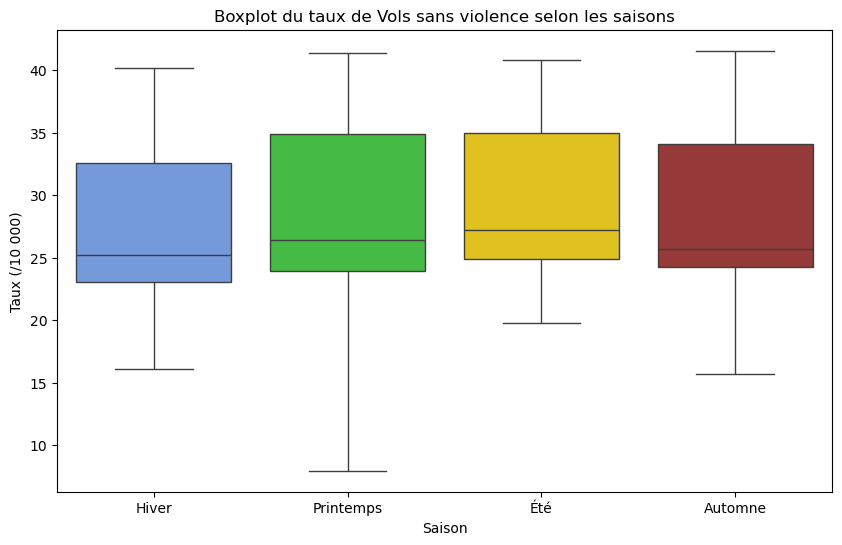

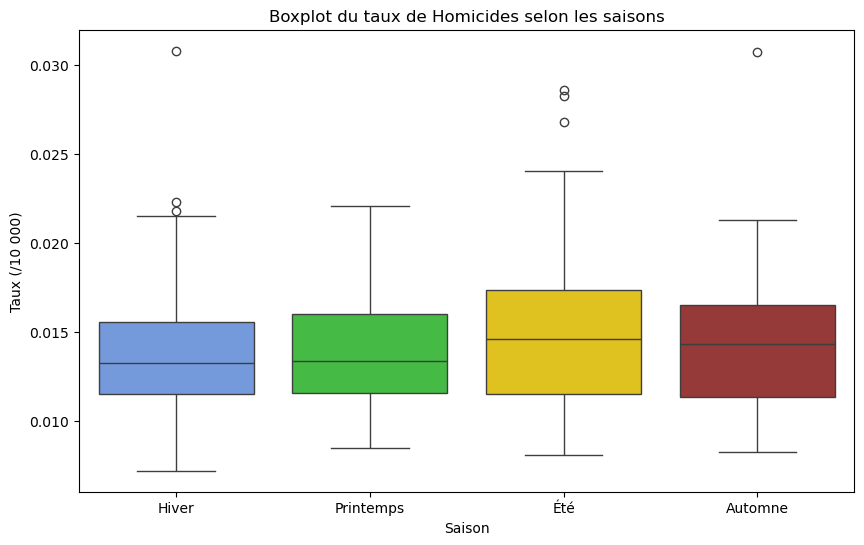

In [13]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence")
boxplot_indicateur_par_saison(df_indicateurs_nat, "Homicides")

<span style="color:red;">**déplacer les fonctions de database_légifrance dans le script et les importer ici pour la partie de stat desc**</span>

/home/onyxia/work/Python-pour-la-data-science-2A-1/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A-1/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A-1/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to

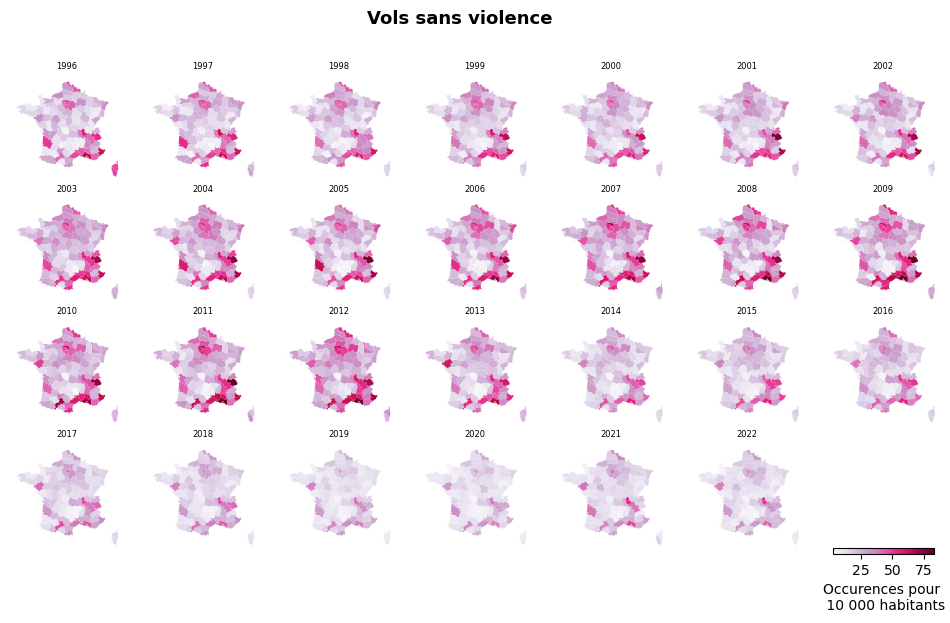

In [14]:
évolution_indicateur(df_indicateurs_dep, "Vols sans violence")

In [16]:
print(df_indicateurs_dep['Année'].dtype)  # Vérifier le type de données de la colonne Année
print(df_indicateurs_dep['Indicateur'].dtype)  # Vérifier le type de données de la colonne Indicateur


int64
object


        # Vérification des lignes sans géométrie
        if df_filtre['geometry'].isna().any():
            print(f"Année {annee} : Certaines géométries sont manquantes pour {indicateur}")
            print(df_filtre)

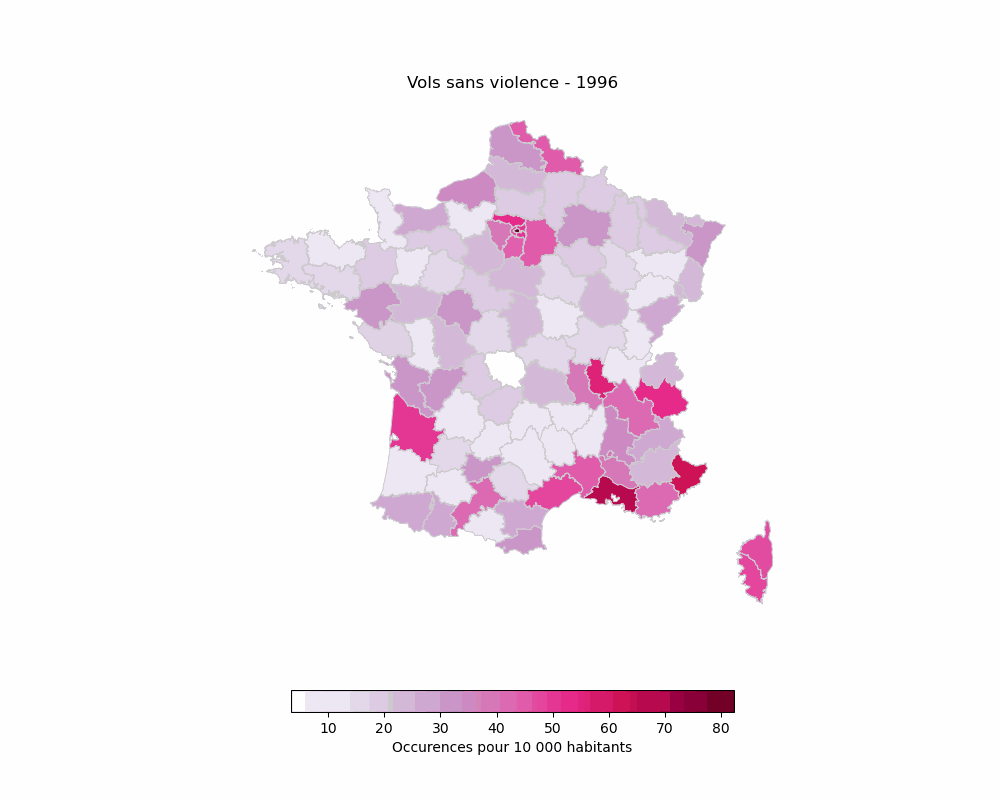

Animation sauvegardée dans animations/evolution_Vols_sans_violence.gif


In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Vols sans violence", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Coups et blessures volontaires", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stupéfiants", dictionnaire_geo)

In [18]:
from matplotlib.colors import LinearSegmentedColormap

# Définir une colormap personnalisée
def create_custom_greys_cmap():
    # Points de contrôle pour la colormap (0: blanc, 1: noir, ajustés pour nuances intermédiaires)
    colors = [
        (0.95, 0.95, 0.95),  # Très clair
        (0.8, 0.8, 0.8),    # Clair
        (0.6, 0.6, 0.6),    # Intermédiaire
        (0.4, 0.4, 0.4),    # Assez foncé
        (0.2, 0.2, 0.2)     # Foncé mais pas noir
    ]
    return LinearSegmentedColormap.from_list("CustomGreys", colors)

# Créer la colormap
custom_greys_cmap = create_custom_greys_cmap()

In [19]:
def animer_evolution_densite(df, colonne_densite, dictionnaire_geometrie):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd

    plt.ioff()
    
    # Préparer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Créer une liste des années disponibles dans le DataFrame
    annees = sorted(df['Année'].unique())
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise à jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les données pour l'année en cours
        df_filtre = df[df['Année'] == annee].copy()
        
        # Ajouter les géométries depuis le dictionnaire
        df_filtre['geometry'] = df_filtre['Département'].map(dictionnaire_geometrie)
        
        # Créer un GeoDataFrame à partir du DataFrame filtré
        gdf = gpd.GeoDataFrame(df_filtre, geometry='geometry')
        
        # Vérifier si le GeoDataFrame n'est pas vide
        if not gdf.empty:
            # Calculer les limites de couleur
            vmin = df[colonne_densite].min()
            vmax = df[colonne_densite].max()
            
            # Tracer la carte
            gdf.plot(column=colonne_densite, 
                     cmap=custom_greys_cmap,  # Colormap générique
                     ax=ax, 
                     legend=False,
                     vmin=vmin,
                     vmax=vmax,
                     edgecolor='0.8',
                     linewidth=0.5)
            
            # Titre de la carte
            ax.set_title(f"Densité de population - {annee}")
        else:
            print(f"Année {annee} : Aucune donnée disponible")
        
        ax.axis("off")
        ax.set_aspect(1.4)  # Étirement vertical de la carte 
        
        return []
    
    # Créer l'animation
    anim = animation.FuncAnimation(fig, 
                                   update, 
                                   init_func=init,
                                   frames=len(annees), 
                                   interval=500,  # 500 ms entre chaque frame
                                   blit=False)
    
    # Ajouter une barre de couleur
    vmin = df[colonne_densite].min()
    vmax = df[colonne_densite].max()
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1, label="Densité (hab/km²)")
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)  # Crée un dossier 'animations' s'il n'existe pas
    
    # Chemin de sauvegarde
    save_path = f'animations/evolution_densite.gif'
    
    # Sauvegarde en GIF
    anim.save(save_path, writer='pillow', fps=2)

    # Afficher l'animation
    display(Image(filename=save_path))
    
    print(f"Animation sauvegardée dans {save_path}")
    
    return anim

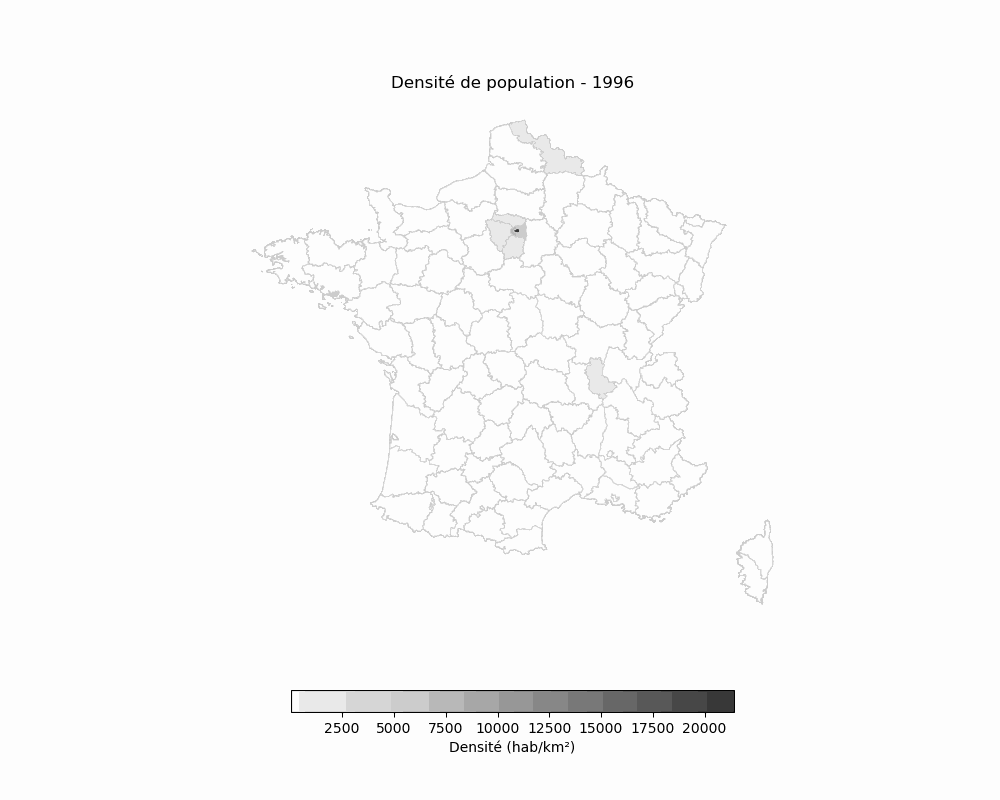

Animation sauvegardée dans animations/evolution_densite.gif


In [20]:
animer_evolution_densite(
    df=df_indicateurs_dep, 
    colonne_densite='Densité', 
    dictionnaire_geometrie=dictionnaire_geo
)

Visualisation pas hyper concluante parce que bon département hors des grandes villes ont des densité assez similaires et assez faibles donc bon ronpiche, on verra comment adapter l'échelle de couleur

In [21]:
def evolution_idf_animation(df, indicateur):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd
    import matplotlib.pyplot as plt
    
    plt.ioff()
    
    # Filtrer pour l'Île-de-France (codes 75, 77, 78, 91, 92, 93, 94, 95)
    idf_codes = ['75', '77', '78', '91', '92', '93', '94', '95']
    df_idf = df[df['Département'].isin(idf_codes)].copy()
    
    # Ajouter la géométrie à partir du dictionnaire
    df_idf['geometry'] = df_idf['Département'].map(dictionnaire_geo)

    nom_departement = {
        '75': 'Paris', '77': 'Seine-et-Marne', '78': 'Yvelines', '91': 'Essonne', 
        '92': 'Hauts-de-Seine', '93': 'Seine-Saint-Denis', '94': 'Val-de-Marne', '95': 'Val-d\'Oise'
    }
    df_idf['Nom_Departement'] = df_idf['Département'].map(nom_departement)

    gdf_idf = gpd.GeoDataFrame(df_idf, geometry='geometry')
    
    # Créer une liste des années
    annees = sorted(df_idf['Année'].unique())

    # Définir les limites des valeurs de densité pour la colorbar
    vmin = df_idf[indicateur].min()
    vmax = df_idf[indicateur].max()
    
    # Préparer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

    # Configurer la colorbar une seule fois
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])  # Nécessaire pour éviter les erreurs avec colorbar
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', label=f"{indicateur}")
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise à jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les données pour l'année en cours
        gdf_frame = gdf_idf[gdf_idf['Année'] == annee]
        
        # Définir les limites des axes pour centrer sur l'Île-de-France
        bounds = gdf_frame.total_bounds
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Tracer la carte
        gdf_frame.plot(
            column=indicateur,
            cmap=custom_greys_cmap,  # Utilisez une cmap adaptée
            ax=ax,
            legend=False,
            edgecolor='0.8',
            linewidth=0.7
        )
        
        # Ajouter le titre de l'année
        ax.set_title(f"{indicateur} - {annee}", fontsize=14)
        ax.axis("off")
        ax.set_aspect(1.4)

        # Ajouter les noms des départements
        for _, row in gdf_frame.iterrows():
            # Récupérer le centroïde du département
            centroid = row['geometry'].centroid
            # Ajouter le texte sans boîte blanche, en gris foncé et avec une police plus fine
            ax.text(
                centroid.x, centroid.y, 
                row['Nom_Departement'], 
                ha='center', va='center', 
                fontsize=8, color='#666666', 
                fontweight='light',  
            )
        
        return []
    
    # Créer l'animation
    anim = animation.FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=len(annees),
        interval=500,
        blit=False
    )
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)
    save_path = 'animations/evolution_idf_densite.gif'
    anim.save(save_path, writer='pillow', fps=2)
    
    # Afficher l'animation
    display(Image(filename=save_path))
    print(f"Animation sauvegardée dans {save_path}")
    return anim


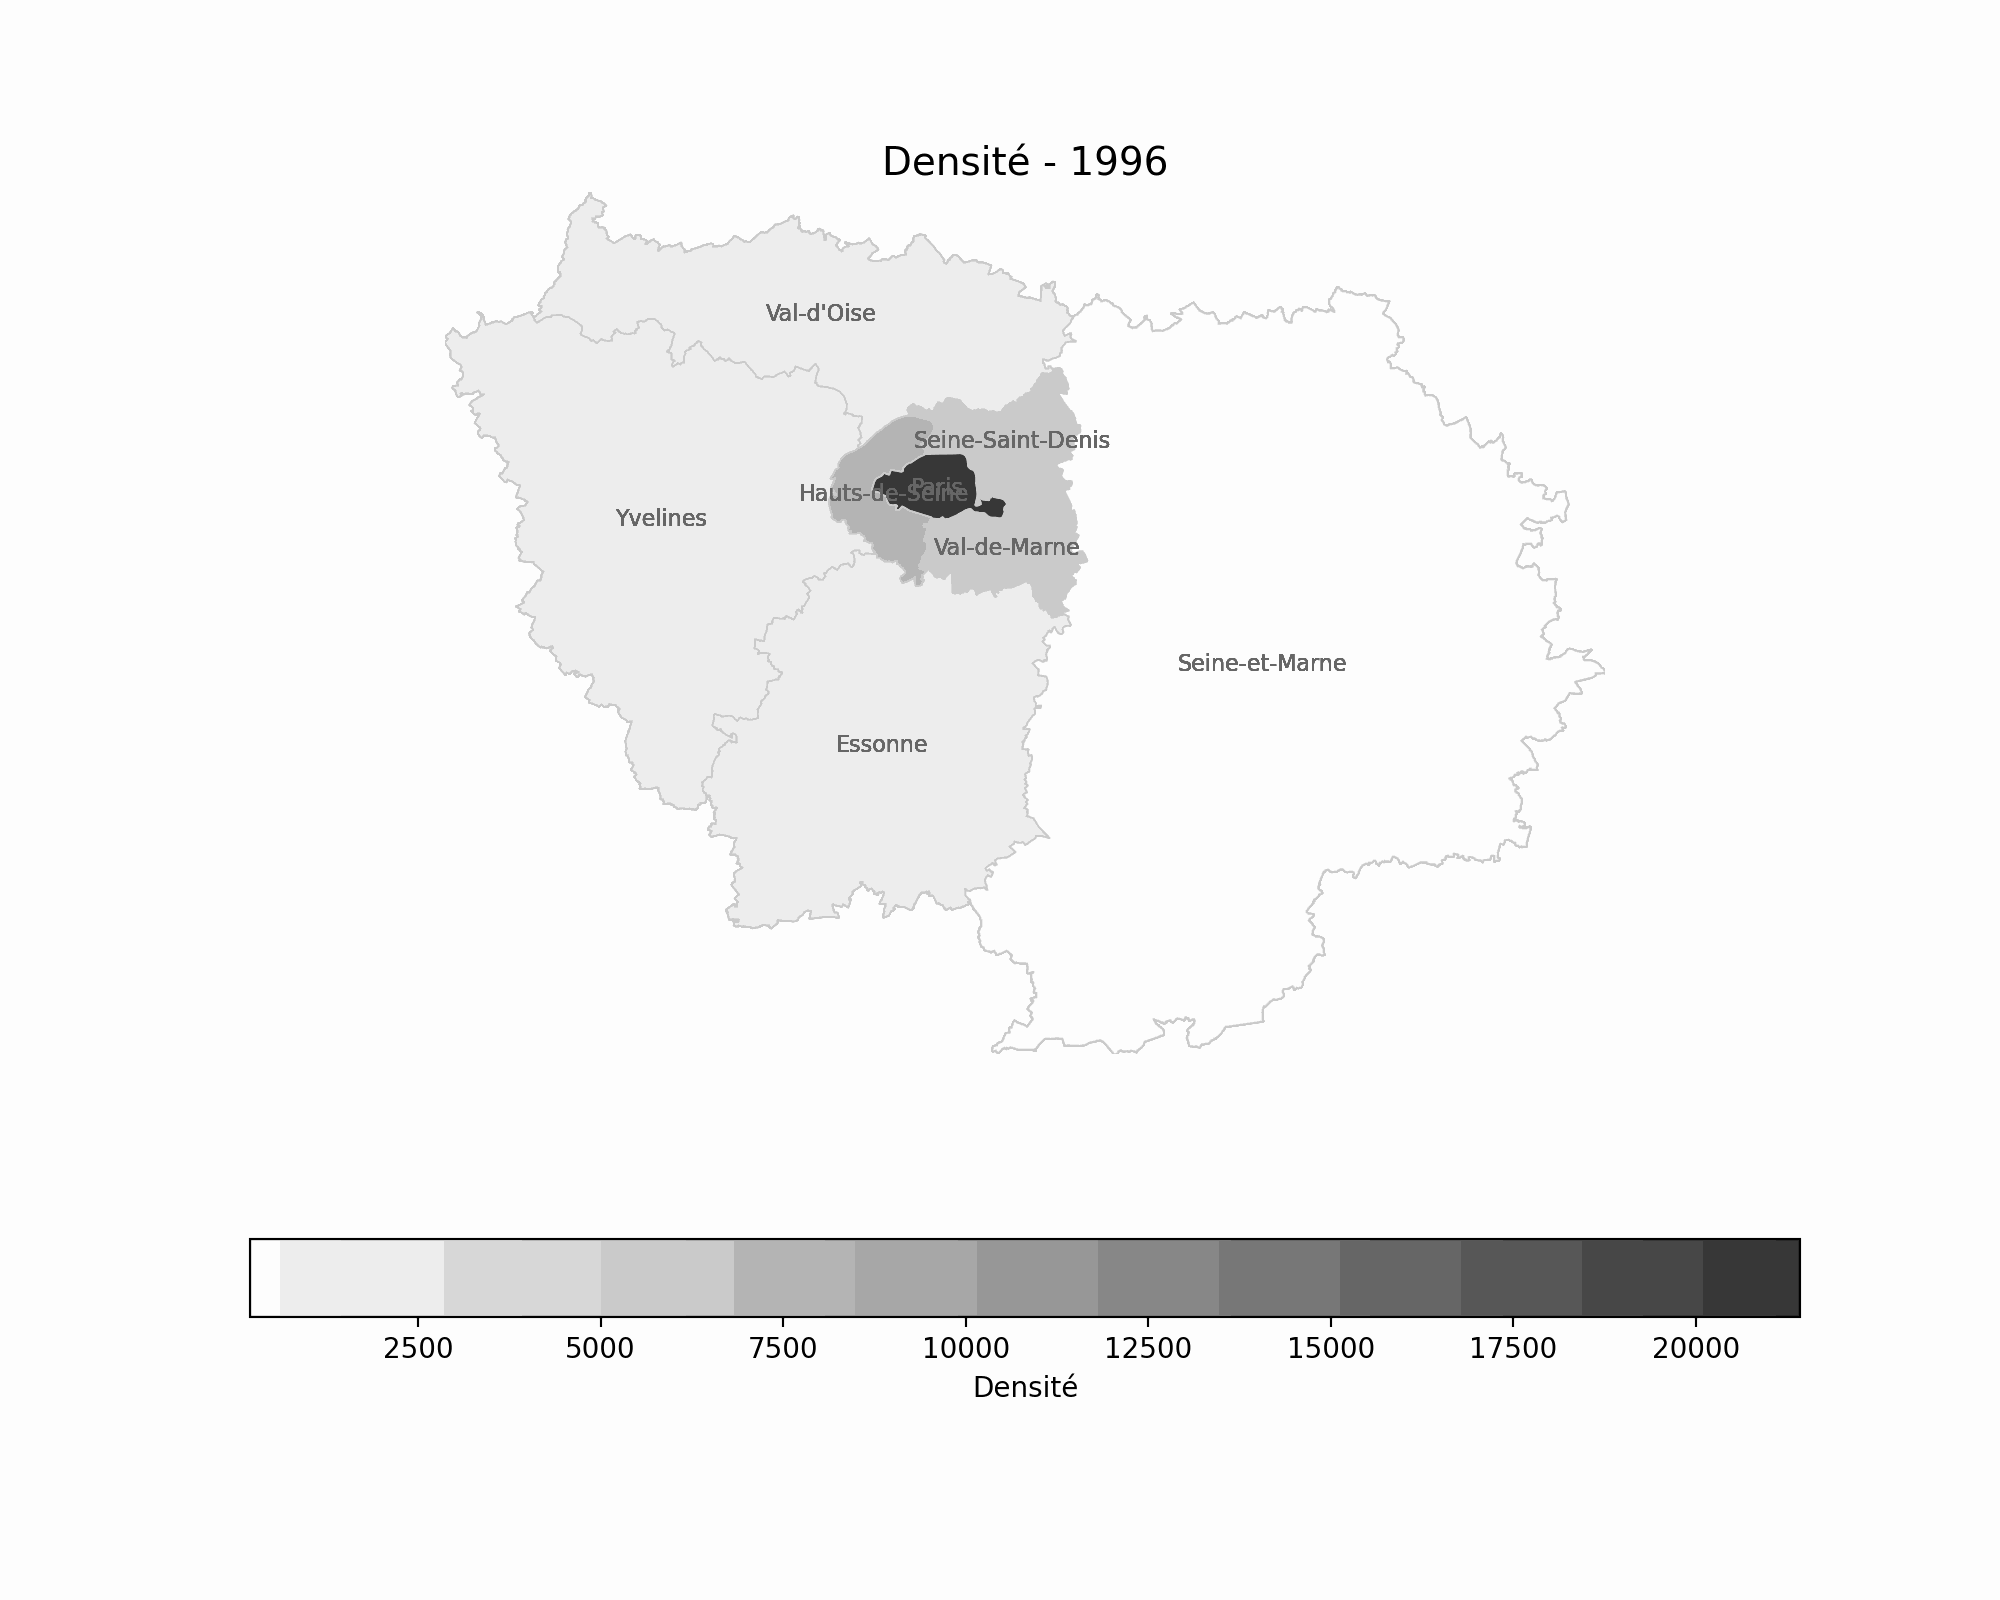

Animation sauvegardée dans animations/evolution_idf_densite.gif


In [22]:
evolution_idf_animation(df_indicateurs_dep, 'Densité')

In [23]:
print("Clés du dictionnaire :", list(dictionnaire_geo.keys()))
print("Départements uniques dans le DataFrame :", df_indicateurs_dep['Département'].unique())


Clés du dictionnaire : ['01', '02', '03', '04', '05', '06', '2A', '2B', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95']
Départements uniques dans le DataFrame : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70

In [24]:
df_indicateurs_dep['Département'].dtype


dtype('O')

In [25]:
types_cles = {type(key) for key in dictionnaire_geo.keys()}
types_valeurs = {type(value) for value in dictionnaire_geo.values()}

print(f"Types des clés : {types_cles}")
print(f"Types des valeurs : {types_valeurs}")

Types des clés : {<class 'str'>}
Types des valeurs : {<class 'shapely.geometry.multipolygon.MultiPolygon'>, <class 'shapely.geometry.polygon.Polygon'>}


In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Coups et blessures volontaires", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stupéfiants", dictionnaire_geo)

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stupéfiants", dictionnaire_geo)

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Stupéfiants", dictionnaire_geo)